In [108]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [109]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [110]:
## distribution of each numeric colum

In [111]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### plotting utility

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil

##
## use this utility to produce boxplots and density plots for the features in your dataset
## type= {boxplot, kdeplot, histogram}
##


def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot', 'histplot'}:
        print("only type= {boxplot, dkeplot, histplot} are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 3
    
    if len(columns) <3:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 3)
    
    print(len(columns))
    print('{r}x{c} subplots'.format(r=numRows, c=numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    i=j=0
    
    for c in columns:
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs[i,j])
        elif type == 'histplot':
            sns.histplot(data=data, x=c, ax=axs[i,j])
        else:
            sns.kdeplot(data=data, x=c, ax=axs[i,j])

        axs[i,j].set_title(c)
        j = j+1
        if j == 3:
            i = i+1
            j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
9
3x3 subplots


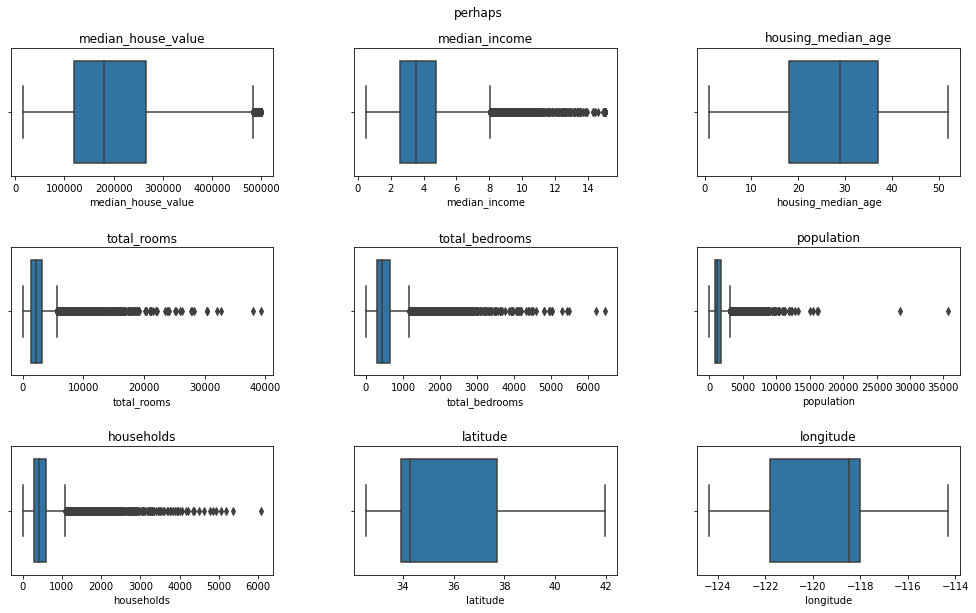

In [113]:
## your code here

plot_distributions(houses, houses.columns, type = 'boxplot', title = 'perhaps')

In [114]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### feature normalisation 

Some of the features need to be normalised before any conclusion can be drawn

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude', 'pop_per_houses', 'bed_per_houses', 'pop_per_bed']
12
4x3 subplots


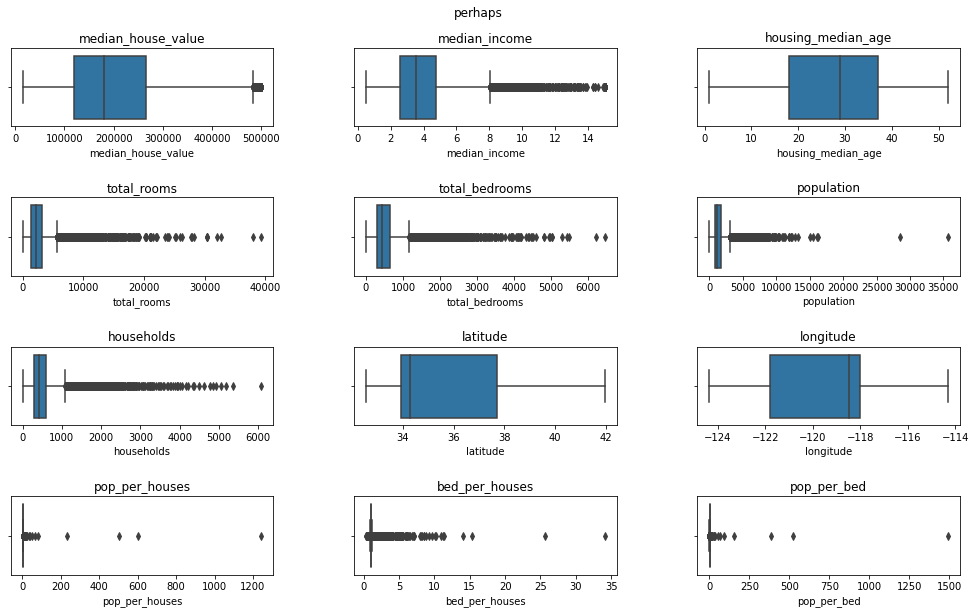

In [115]:
## normalising the features -- your code here

#if final value < distance(x)
#end graph sooner and zoom in 


#dividing by something significant so it makes sense
#its meant to be simple
#so make sure the data makes sense in the context
#derivative variables of the columns 

#if int(houses.columns[3]) > 20:
  #print("This works yaknow")
#else: 
 # print("This didnt work yaknow")

 
pop_per_house = houses.population / houses.households
bed_per_house = houses.total_bedrooms / houses.households
pop_per_bed = houses.population / houses.total_bedrooms

houses["pop_per_houses"] = pop_per_house
houses["bed_per_houses"] = bed_per_house
houses["pop_per_bed"] = pop_per_bed

plot_distributions(houses, houses.columns, type = 'boxplot', title = 'perhaps')

### record identification

based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

Population per house outliers:  Int64Index([3364, 13034, 16669, 19006], dtype='int64')
Bedrooms per house outliers:  Int64Index([ 1024,  1102,  1233,  1234,  1238,  1239,  1240,  1867,  1872,
             1889,
            ...
            19362, 19736, 19802, 19807, 19975, 19976, 19977, 20093, 20094,
            20113],
           dtype='int64', length=107)
Population per bedroom outliers:  Int64Index([3364, 9172, 12104, 13034, 16420, 16669, 19006], dtype='int64')
plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude', 'pop_per_houses', 'bed_per_houses', 'pop_per_bed']
12
4x3 subplots


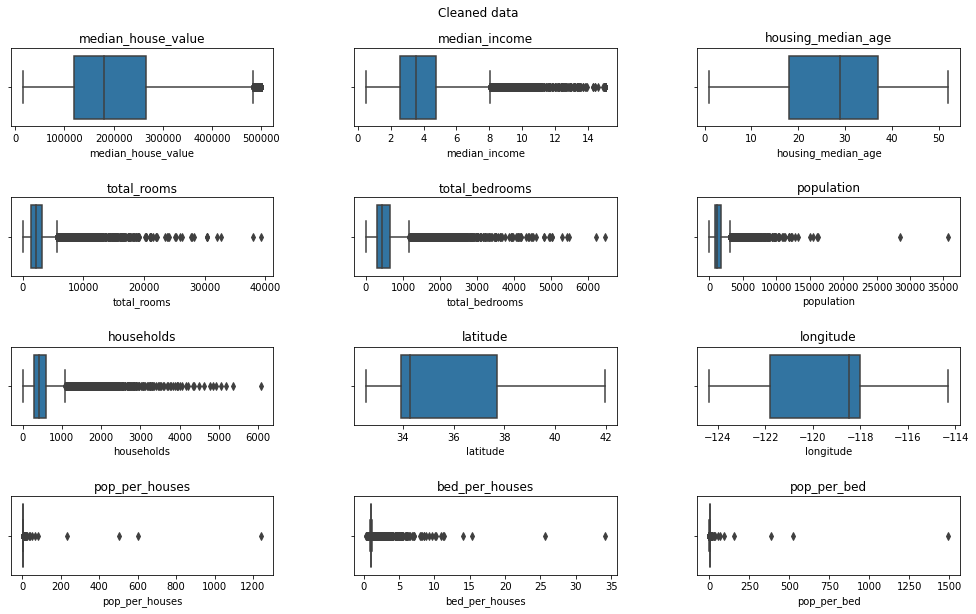

In [116]:
## your code here 

pphOutliers = houses[houses["pop_per_houses"] > 100]
bphOutliers = houses[houses["bed_per_houses"] > 3]
ppbOutliers = houses[houses["pop_per_bed"] > 50]

print("Population per house outliers: ", pphOutliers.index)
print("Bedrooms per house outliers: ", bphOutliers.index)
print("Population per bedroom outliers: ", ppbOutliers.index)


#houses = houses.drop(pphOutliers.index)
#houses = houses.drop(bphOutliers.index)
#houses = houses.drop(ppbOutliers.index)



plot_distributions(houses, houses.columns, type = 'boxplot', title = 'Cleaned data')

Population per house outliers:  Int64Index([   91,    92,   270,   435,   457,   459,   460,   537,  1039,
             1067,
            ...
            20259, 20280, 20297, 20311, 20318, 20324, 20352, 20393, 20513,
            20527],
           dtype='int64', length=345)
Bedrooms per house outliers:  Int64Index([  710,  1023,  1024,  1030,  1102,  1233,  1234,  1235,  1236,
             1238,
            ...
            19975, 19976, 19977, 20089, 20092, 20093, 20094, 20110, 20112,
            20113],
           dtype='int64', length=235)
Population per bedroom outliers:  Int64Index([   91,   270,  1039,  1067,  1617,  2723,  2899,  3364,  4479,
             4861,  5985,  5986,  7164,  7165,  8874,  9172, 12104, 12649,
            13034, 13366, 13606, 14756, 15790, 16171, 16420, 16528, 16594,
            16643, 16669, 16672, 18520, 19006, 19524, 20121, 20352],
           dtype='int64')
Population per house outliers total:  median_house_value    615
median_income         615
housing_

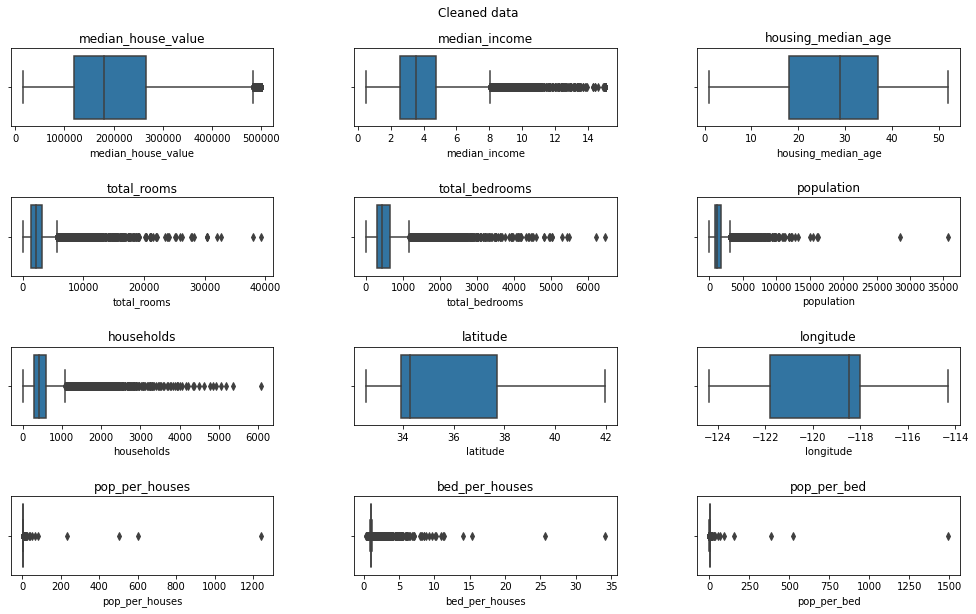

In [117]:
pphOutliers = houses[houses["pop_per_houses"] > 5]
bphOutliers = houses[houses["bed_per_houses"] > 2]
ppbOutliers = houses[houses["pop_per_bed"] > 10]

print("Population per house outliers: ", pphOutliers.index)
print("Bedrooms per house outliers: ", bphOutliers.index)
print("Population per bedroom outliers: ", ppbOutliers.index)


total_outliers = pphOutliers.count() + bphOutliers.count() + ppbOutliers.count()
print("Population per house outliers total: ", total_outliers)

#houses = houses.drop(pphOutliers.index)
#houses = houses.drop(bphOutliers.index)
#houses = houses.drop(ppbOutliers.index)



plot_distributions(houses, houses.columns, type = 'boxplot', title = 'Cleaned data')

After analysing the boxplots for a second time, I have removed the populations per households that are greater than 11 as the records are skewed towards 1-5. This allows us to see a lot of the higher than average results while still clearly seeing the median.

For bedrooms per household, I have removed all records greater than 3 because a majority of the records have a median average around 1 and so anything in excess of that could be considered anomalous. 

Finally, I have removed populations per bedrooms greater than 10 because this will allow flat shares to still be considered while showing that the average is still much lower than this. 

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

In [118]:
corr1 = houses.median_house_value.corr(houses.pop_per_houses)
corr2 = houses.median_house_value.corr(houses.bed_per_houses)

print("correlations: median value to number of rooms: {0:.2}, median value to number of bedrooms: {1:.2}".format(corr1, corr2))

correlations: median value to number of rooms: -0.024, median value to number of bedrooms: -0.047


it appears that house value is not strongly correlated with size, so probably location is a more relevant factor

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [121]:
from sklearn.neighbors import LocalOutlierFactor

clf_data = houses[['pop_per_houses', 'bed_per_houses', 'pop_per_bed']]
#clf_data = houses

clf = LocalOutlierFactor(n_neighbors=20)
result = clf.fit_predict(clf_data)

outlier_index_lof = np.where(result == -1)
outlier_values_lof = houses.iloc[outlier_index_lof]
outlier_values_lof

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,pop_per_houses,bed_per_houses,pop_per_bed
59,60000.0,2.5625,2.0,158.0,43.0,94.0,57.0,37.82,-122.29,1.649123,0.754386,2.186047
73,67500.0,0.4999,46.0,12.0,4.0,18.0,7.0,37.81,-122.29,2.571429,0.571429,4.500000
140,483300.0,6.3624,30.0,292.0,38.0,126.0,52.0,37.81,-122.18,2.423077,0.730769,3.315789
192,75000.0,2.1000,51.0,175.0,43.0,228.0,55.0,37.79,-122.25,4.145455,0.781818,5.302326
700,340000.0,6.5000,20.0,200.0,25.0,83.0,31.0,37.69,-122.03,2.677419,0.806452,3.320000
...,...,...,...,...,...,...,...,...,...,...,...,...
20311,243800.0,2.0368,37.0,470.0,105.0,522.0,83.0,34.17,-119.11,6.289157,1.265060,4.971429
20322,500001.0,2.5714,8.0,243.0,75.0,102.0,80.0,34.23,-119.14,1.275000,0.937500,1.360000
20349,125000.0,7.3004,32.0,166.0,22.0,63.0,29.0,34.17,-119.08,2.172414,0.758621,2.863636
20352,52500.0,4.0208,8.0,40.0,10.0,309.0,16.0,34.22,-119.09,19.312500,0.625000,30.900000


# KNN

In [120]:
from sklearn.neighbors import NearestNeighbors


knn_data = houses[['pop_per_houses', 'bed_per_houses', 'pop_per_bed']]


X = knn_data.values

knn = NearestNeighbors(n_neighbors=20)
knn.fit(X)
distance, index = knn.kneighbors(X)

outlier_index_knn = np.where(distance.mean(axis=1) > 0.5)
outlier_values_knn = houses.iloc[outlier_index_knn]
outlier_values_knn

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,pop_per_houses,bed_per_houses,pop_per_bed
73,67500.0,0.4999,46.0,12.0,4.0,18.0,7.0,37.81,-122.29,2.571429,0.571429,4.500000
91,137500.0,0.8668,52.0,215.0,87.0,904.0,88.0,37.80,-122.28,10.272727,0.988636,10.390805
270,225000.0,3.8750,33.0,142.0,31.0,575.0,47.0,37.78,-122.18,12.234043,0.659574,18.548387
460,175000.0,1.4012,52.0,1087.0,371.0,3337.0,350.0,37.87,-122.26,9.534286,1.060000,8.994609
1039,121900.0,4.3029,16.0,1748.0,322.0,4930.0,287.0,38.42,-120.97,17.177700,1.121951,15.310559
...,...,...,...,...,...,...,...,...,...,...,...,...
20248,275000.0,8.0000,28.0,26.0,3.0,29.0,9.0,34.25,-119.23,3.222222,0.333333,9.666667
20311,243800.0,2.0368,37.0,470.0,105.0,522.0,83.0,34.17,-119.11,6.289157,1.265060,4.971429
20324,194100.0,3.5625,31.0,737.0,146.0,1436.0,168.0,34.25,-119.12,8.547619,0.869048,9.835616
20352,52500.0,4.0208,8.0,40.0,10.0,309.0,16.0,34.22,-119.09,19.312500,0.625000,30.900000


## Your overall conclusions here

My initial data analysis fielded what I considered to be 615 total outliers when considering the normalised data fields of population per household, bedrooms per household, and population per bedrooms. Just from looking at the histograms, I would have considered this a fair result - however, when compared to the results for the outlier detecting algorithms, this is much more than it actually is. LOF found 192 outliers, and KNN found 155. As these two numbers are quite close to each other (when considering the 20,000+ dataframe), it would be fair for me to consider this a much more accurate amount of outliers than my own. 

A simple reason for the significant differences between the results is mine rely on what I would personally conisder an outlier when thinking about houses in general, whereas both of the algorithms are only affected by the data that they have and so are entirely impartial and truthful. I can conclude that it is always better to use the algorithms rather than human judgement, especially when conisdering data that relies on being accurate to a specific region.   